In [ ]:
%pip install ultralytics

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/Temp/areaDetection/LeafDetection.pt')
results = model.predict(source='/content/drive/MyDrive/Temp/52525.png', conf=0.25)


image 1/1 /content/drive/MyDrive/Temp/52525.png: 640x576 1 leaf, 766.5ms
Speed: 3.1ms preprocess, 766.5ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)


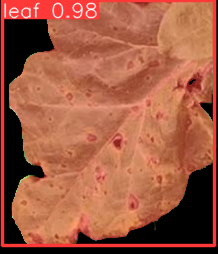

In [ ]:
annotated_frame = results[0].plot()
cv2_imshow( annotated_frame)

In [ ]:
originalImg = results[0].orig_img

In [ ]:
mask = (results[0].masks.data[0].cpu().numpy() * 255).astype("uint8")

In [ ]:
mask = cv2.resize(mask, (originalImg.shape[1], originalImg.shape[0]))

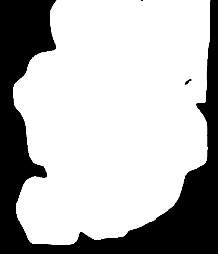

In [ ]:
cv2_imshow(mask)

In [ ]:
num_white_pixels = np.sum(mask == 255)
num_black_pixels = np.sum(mask == 0)

# Calculate the total number of pixels
total_pixels = mask.shape[0] * mask.shape[1]


print(f"Total number of pixels: {total_pixels}")
print(f"Number of white pixels: {num_white_pixels}")
print(f"Number of black pixels: {num_black_pixels}")

print(f'total leaf area: {num_white_pixels/total_pixels*100} %')

Total number of pixels: 55372
Number of white pixels: 39361
Number of black pixels: 15691
total leaf area: 71.08466372896048 %


In [ ]:
masked_image = cv2.bitwise_and(originalImg,originalImg,mask = mask)

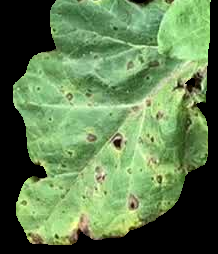

In [ ]:
cv2_imshow(masked_image)

model 2

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/Temp/areaDetection/DamageDetection.pt')
results = model.predict(source='/content/drive/MyDrive/Temp/52525.png', conf=0.25)
annotated_frame = results[0].plot()
# cv2_imshow( annotated_frame)


image 1/1 /content/drive/MyDrive/Temp/52525.png: 640x576 8 leaf-damages, 744.5ms
Speed: 4.5ms preprocess, 744.5ms inference, 29.5ms postprocess per image at shape (1, 3, 640, 640)


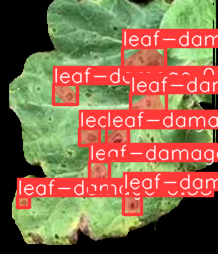

In [ ]:
from google.colab.patches import cv2_imshow

annotated_frame = results[0].plot()
cv2_imshow( annotated_frame)

In [ ]:
res = results[0].orig_img

In [ ]:
mask = (results[0].masks.data[3].cpu().numpy() * 255).astype("uint8")

In [ ]:
for i in range(1, len(results[0].masks)):
    mask += (results[0].masks.data[i].cpu().numpy() * 255).astype("uint8")

In [ ]:
mask = cv2.resize(mask, (res.shape[1], res.shape[0]))

In [ ]:
cv2_imshow(mask)

In [ ]:
num_white_pixels = np.sum(mask == 255)
num_black_pixels = np.sum(mask == 0)

# Calculate the total number of pixels
total_pixels = mask.shape[0] * mask.shape[1]


print(f"Total number of pixels: {total_pixels}")
print(f"Number of white pixels: {num_white_pixels}")
print(f"Number of black pixels: {num_black_pixels}")

print(f'total damage area: {num_white_pixels/total_pixels*100} %')

In [ ]:
replaced_image = cv2.bitwise_and(res,res,mask = mask)

In [ ]:
cv2_imshow(replaced_image)